### Import all the packages needed for this ipynb

In [24]:
import matplotlib.pyplot as plt
import numpy as np

#### Run the python file dietary_faotools.py inline here. To avoid any errors make sure all the CSVs are downloaded and saved in the master folder. For more information see README

In [5]:
%run dietary_faotools.py

The example output of the function get_land_saved() with arguments - FAO area code, diet category, diet level (either 1000 kcals/day or 2000kcals/day) and year. 

returns local, remote and total land saved corresponding to a diet category if area_code switched to 2010 USDA recommendation of diet breakdown at that year. For details see [1]

In [6]:
get_land_saved(231, 'meats', 2000, 2002)  

{'local': 121468706.65741283,
 'remote': 22201265.647506367,
 'total': 143669972.30491915}

In [10]:
land_use_dict = {}
for year in range(start_year,end_year + 1):
    local_res = 0.0
    remote_res = 0.0
    total_res = 0.0
    for area in areapd.loc[areapd['Country Group'] == 'Northern America']['Country Code'].tolist():
        result = get_land_saved(area, 'grains', 2000, year)    
        local_res += result['local']
        remote_res += result['remote']
        total_res += result['total']
    land_use_dict[year] = (local_res,remote_res,total_res)
    #print(year)

Plot showing land-spared totally and locally if area (in title) switched to the 2010 USDA dietary recommendation of calorie intake for diet category (in title) versus years.

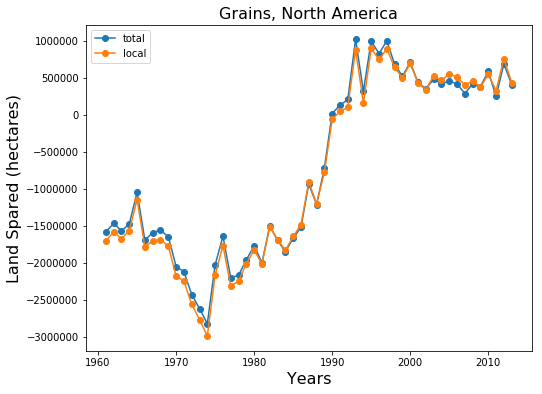

In [22]:
plt.figure(figsize = (8,6))
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o',label = 'total')
plt.plot(land_use_dict.keys(),[x[0] for x in list(land_use_dict.values())],'-o', label = 'local')
plt.ylabel('Land Spared (hectares)', fontsize = 16)
plt.xlabel('Years', fontsize = 16)
plt.title('Grains, North America',fontsize = 16)
plt.legend()
plt.show()

the next cell removes outliers from the total and local land-spared plots. For some food groups in EU there can be unreasonable outlier of values in the year 1991. This is because many countries were broken down and formed (and hence added into the FAO Food Balance Sheet) around then. For example, the population of Croatia, Czezchia etc were 0 till 1990 and were suddenly very high at 1991. Since their former forms are not included in the current EU set, the value spikes at 1991 when they were formed. In order to remove this spike we use

In [12]:
new_land_dict = remove_outlier(land_use_dict,0)
new_land_dict = remove_outlier(new_land_dict,2)

### Outlier removed

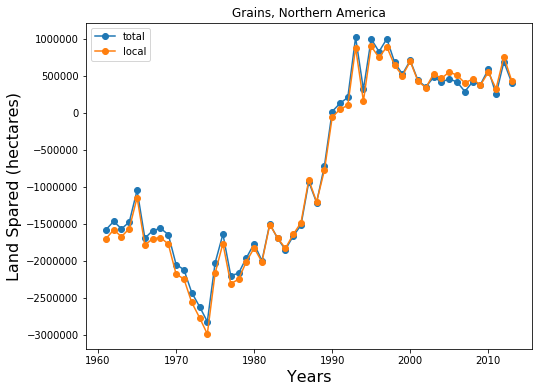

In [23]:
plt.figure(figsize = (8,6))
plt.plot(new_land_dict.keys(),[x[2] for x in list(new_land_dict.values())],'-o',label = 'total')
plt.plot(new_land_dict.keys(),[x[0] for x in list(new_land_dict.values())],'-o', label = 'local')
plt.title('Grains, Northern America')
plt.ylabel('Land Spared (hectares)', fontsize = 16)
plt.xlabel('Years', fontsize = 16)
plt.legend()
plt.show()

### Some other examples of results of total land spared versus years for area codes (in title) switching to 2010 USDA dietary recommendation for food category (in title) 

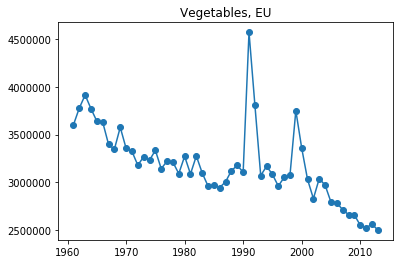

In [249]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Vegetables, EU')
plt.show()

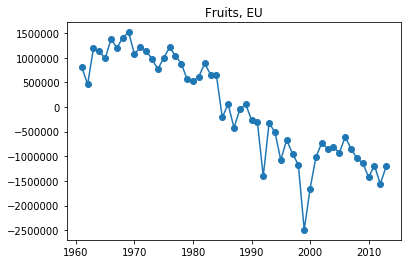

In [187]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Fruits, EU')
plt.show()

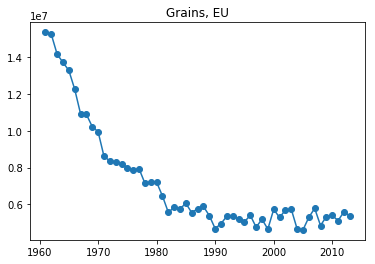

In [189]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Grains, EU')
plt.show()

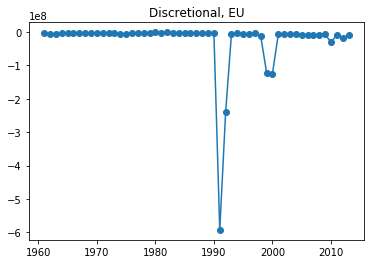

In [242]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Discretional, EU')
plt.show()

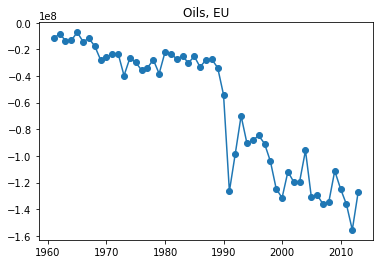

In [216]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Oils, EU')
plt.show()

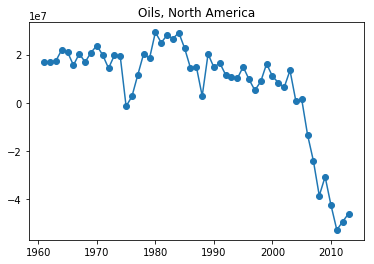

In [220]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Oils, North America')
plt.show()

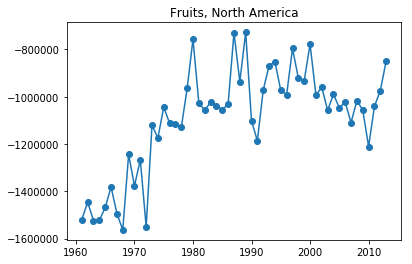

In [224]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Fruits, North America')
plt.show()

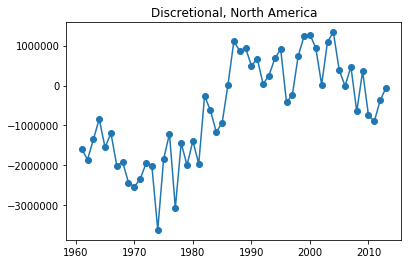

In [226]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Discretional, North America')
plt.show()

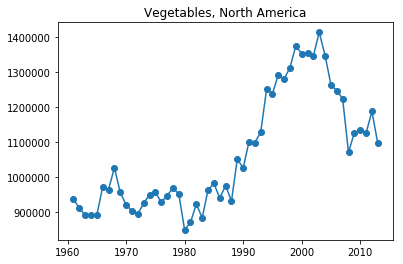

In [240]:
plt.plot(land_use_dict.keys(),[x[2] for x in list(land_use_dict.values())],'-o')
plt.title('Vegetables, North America')
plt.show()

### References:

[1] Sarah  Rizvi,  Chris  Pagnutti,  Evan  Fraser,  Chris  T  Bauch,  and  Madhur  Anand.   Global  land  use  implications  ofdietary trends.PloS one, 13(8):e0200781, 2018.